В этой лекции познакомимся с вами только с одним, но очень важным методом merge().
Этот метод предоставляет более широкие возможности объединения таблиц, в более общем смысле - слияние таблиц.

Часто используется в тех случаях, когда нужно переместить данные из одной таблицы в другую (при этом таблицы имеют разную 
                                                                                            структуру).


In [1]:
import pandas as pd
path = "D:\\new_data/"
data = pd.read_csv(path + "Metro_Interstate_Traffic_Volume.csv")

data.head(7)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
5,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181
6,None,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584


Давайте для начала создадим новую таблицу с именем stat_data. В которую поместим информацию о среднем значение и стандартном отклонении колонки "traffic_volume". Причём, значения будут сгруппированы по колонке "weather_main".

Для более удобного рассчёта среднего и стандартного отклонения импортиуем библиотеку numpy.

In [2]:
import numpy as np

stat_data = data.groupby('weather_main')['traffic_volume'].agg([np.mean, np.std])
stat_data

,mean,std
weather_main,,
Clear,3055.908819,1987.101411
Clouds,3618.449749,1906.202879
Drizzle,3290.727073,1997.901830
Fog,2703.720395,2125.525863
Haze,3502.101471,1873.511057
Mist,2932.956639,2073.025670
Rain,3317.905501,1982.228705
Smoke,3237.650000,1978.015893
Snow,3016.844228,1900.185883


Видим, что в качестве индекса у нас установились значения колонки "weather_main", чего бы нам не очень хотелось. Давайте это 
исправим перезагрузив индекс при помощи метода reset_index().

In [3]:
stat_data.reset_index(inplace=True)
stat_data

,weather_main,mean,std
0,Clear,3055.908819,1987.101411
1,Clouds,3618.449749,1906.202879
2,Drizzle,3290.727073,1997.901830
3,Fog,2703.720395,2125.525863
4,Haze,3502.101471,1873.511057
5,Mist,2932.956639,2073.025670
6,Rain,3317.905501,1982.228705
7,Smoke,3237.650000,1978.015893
8,Snow,3016.844228,1900.185883
9,Squall,2061.750000,1950.070490


Давайте добавим эти данные к основной таблице data. Для этого воспользуемся методом merge(). Метод merge() может вызываться 
двумя разными способами: 

- напрямую из библиотеки Pandas;
- как метод DataFrame.

Давайте вызовем метод напрямую из Pandas.

In [4]:
new_data = pd.merge(data, stat_data)
new_data.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,mean,std
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,3618.449749,1906.202879
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,3618.449749,1906.202879
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,3618.449749,1906.202879
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,3618.449749,1906.202879
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,3618.449749,1906.202879
5,None,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791,3618.449749,1906.202879
6,None,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770,3618.449749,1906.202879
7,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539,3618.449749,1906.202879
8,None,293.66,0.0,0.0,20,Clouds,few clouds,2012-10-03 18:00:00,4623,3618.449749,1906.202879
9,None,290.65,0.0,0.0,20,Clouds,few clouds,2012-10-03 19:00:00,3591,3618.449749,1906.202879


В новой таблице new_data появились две новые колонки "mean" и "std". В метод merge() мы передали две таблицы data, stat_data. 
Метод merge() нашёл первую одинаковую колонку в обоих таблицах "weather_main", выбрал первое уникальное значение в этой колонке
'Clouds'. Далее, используя значение 'Clouds', как ключ, нашёл соответствующие ему значения других колонок в таблице stat_data.
Затем, добавил эти столбцы к таблице data и записал напротив всех значений "Clouds" столбца "weather_main" соответсвующие 
значения столбцов "mean" и "std" таблицы stat_data. Потом взял следующиее значение "Clear", нашёл по нему соответсвующие 
значения в таблице stat_data и подставил их в столбцы "mean" и "std" и так далее для всех уникальных значений weather_main.

Давайте немного усложним задачу. Предположим таблица stat_data не будет содержать информацию по всем значениям. Оставим там только 5 последних значений.

In [5]:
stat_data = stat_data.iloc[6:, :]
stat_data

,weather_main,mean,std
6,Rain,3317.905501,1982.228705
7,Smoke,3237.650000,1978.015893
8,Snow,3016.844228,1900.185883
9,Squall,2061.750000,1950.070490
10,Thunderstorm,3001.620890,1988.296012


Теперь объединим две таблицы и посмотрим, что поулчилось.

In [6]:
new_data = pd.merge(data, stat_data)
new_data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,mean,std
0,None,287.23,0.0,0.0,100,Rain,light rain,2012-10-09 15:00:00,5777,3317.905501,1982.228705
1,None,281.25,0.0,0.0,99,Rain,light rain,2012-10-10 07:00:00,6793,3317.905501,1982.228705
2,None,280.10,0.0,0.0,99,Rain,light rain,2012-10-10 08:00:00,6283,3317.905501,1982.228705
3,None,279.61,0.0,0.0,99,Rain,light rain,2012-10-10 09:00:00,5680,3317.905501,1982.228705
4,None,282.26,0.0,0.0,72,Rain,light rain,2012-10-12 04:00:00,739,3317.905501,1982.228705
...,...,...,...,...,...,...,...,...,...,...,...
9601,None,285.60,0.0,0.0,1,Smoke,smoke,2016-05-07 08:00:00,3139,3237.650000,1978.015893
9602,None,287.35,0.0,0.0,75,Smoke,smoke,2016-05-07 09:00:00,4085,3237.650000,1978.015893
9603,None,294.58,0.0,0.0,75,Smoke,smoke,2017-09-01 16:00:00,5952,3237.650000,1978.015893
9604,None,298.34,0.0,0.0,1,Smoke,smoke,2018-08-18 12:00:00,4448,3237.650000,1978.015893


Как вы могли заметить, наша таблица сильно сократилась и теперь содержит только 9606 строк, хотя в изначальной таблице у нас было 48204 строк. Произошло это потому, что по умолчанию метод merge объеденяет только по тем значениям, котоырые есть в обоих таблицах. Так, как значения "Clear, Clouds, Drizzle, Fog, Haze, Mist" в таблице stat_data отсутсвуют, то merge() просто выкинул все строки, котоыре содержат эти значения из новой таблицы new_data. Способ объединения можно изменить, если в явно виде указать
параметр "how", который по умолчанию равен 'inner'. Возможные варианты установки:
 * inner - в объеденённой таблице будт только те элементы из столбца "weather_main", которые есть в обоих таблицах.
 * outer - в объеденённой таблице будт все элементы из столбца "weather_main" с обоих таблиц.
 * left - в объеденённой таблице будт только те элементы из столбца "weather_main", которые есть только в первой таблице.
 * right - в объеденённой таблице будт только те элементы из столбца "weather_main", которые есть только во второй таблице.

Для лучшего понимания посмотрите на рисунок, который отображает типы объединения.

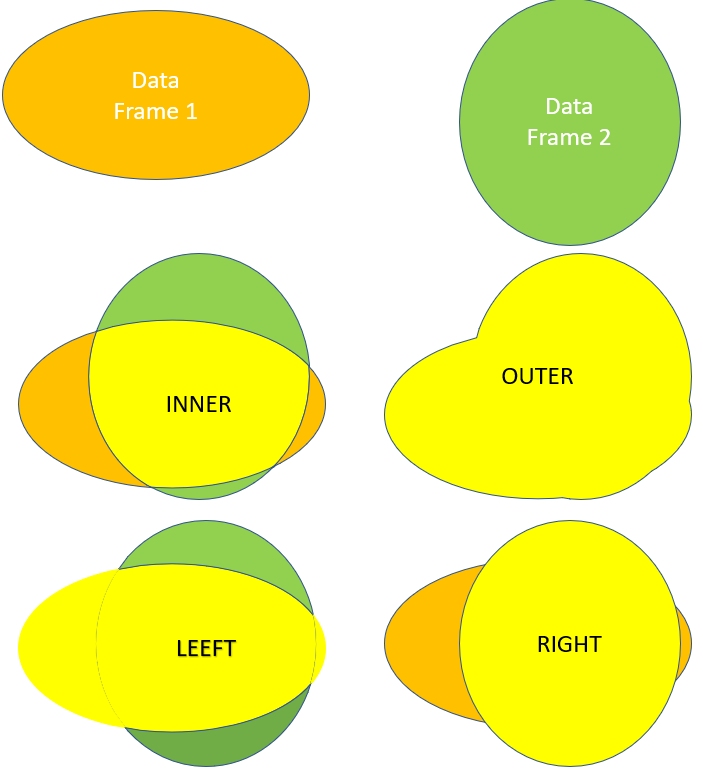

In [7]:
from IPython.display import Image
Image(filename='D:/my_courses/Introduction_to_Pandas/Lection_8/merge.png',width=400, height=200)

Давйте изменим параметр how на "outer" и посмотрим, что изменилось.

In [8]:
new_data = pd.merge(data, stat_data, how='outer')
new_data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,mean,std
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,NaN,NaN
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,NaN,NaN
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,NaN,NaN
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,NaN,NaN
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
48199,None,285.60,0.0,0.0,1,Smoke,smoke,2016-05-07 08:00:00,3139,3237.65,1978.015893
48200,None,287.35,0.0,0.0,75,Smoke,smoke,2016-05-07 09:00:00,4085,3237.65,1978.015893
48201,None,294.58,0.0,0.0,75,Smoke,smoke,2017-09-01 16:00:00,5952,3237.65,1978.015893
48202,None,298.34,0.0,0.0,1,Smoke,smoke,2018-08-18 12:00:00,4448,3237.65,1978.015893


Теперь даблица содержи 48204 строк. Столько же сколько и было в изначальной таблице "data". Метод merge() как и прежде добавил два столбца "mean" и "std", но в этот раз не выкинул строки о которых в таблице state_data не было информации, а проставил там пустое значени  или "NaN".

Помимо этого, метод merge() позволяет в явном виде задать, по какому столбцу объединять две таблицы. Для этого необходимо в парметре "on" указать имя столбца. Столбец должен обязательно быть в обоих таблицах.

In [9]:
pd.merge(data, stat_data, on='weather_main', how='left')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,mean,std
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,NaN,NaN
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,NaN,NaN
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,NaN,NaN
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,NaN,NaN
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,NaN,NaN
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,NaN,NaN
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,3001.62089,1988.296012
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,NaN,NaN


Мы также можем вызвать метод merge() как метод DataFrame.

In [10]:
data.merge(stat_data, on='weather_main', how='left')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,mean,std
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,NaN,NaN
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,NaN,NaN
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,NaN,NaN
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,NaN,NaN
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,NaN,NaN
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,NaN,NaN
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,3001.62089,1988.296012
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,NaN,NaN


Комманды pd.merge(data, stat_data, on='weather_main', how='left') data.merge(stat_data, on='weather_main', how='left') экваваленты друг другу. В результате вызова обоих комманд мы получи одинаковый результат. Отличие в том, что во втором случае наша запись становиться немного короче. 